This data visualization analysis was performed using a Kaggle dataset called: Titanic - Machine Learning from Disaster
I handled missing values and outliers and I used a combination of bar charts, pie charts, histograms, and scatter plots to visualize the data.
- The bar chart shows the number of survivors and non-survivors in the dataset. 
- The pie chart shows the percentage of survivors and non-survivors.
- The histogram shows the distribution of fares paid by passengers. 
- The scatter plot shows the relationship between fare and survival, where the size of the dots represents the number of passengers with the same fare. Showing that there is a positive correlation between fare and survival, which suggests that passengers who paid higher fares had a higher chance of survival.
- Also, I explored the relationship between age and survival using a box plot. The plot shows that children aged 0-10 had a higher chance of survival than adults aged 20-50.
- In addition, I investigated the effect of gender and class on survival using multiple bar charts. The charts show that females had a higher chance of survival than males, and passengers in first class had a higher chance of survival than passengers in third class.
- Overall, I provided a good overview of the Titanic dataset and uncovered some interesting insights about the factors that influenced survival on the ship.







In [1]:
# Import libraries needed 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# Import libraries needed for data visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [4]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Find missing values
missing_values = train_data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# Replace missing values for 'Age' with median value
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
print (train_data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [8]:
# Check missing values again
missing_values = train_data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
# Drop missing values for 'Embarked'
train_data.dropna(subset=['Embarked'], inplace=True)

# Drop 'Cabin' column
train_data.drop(['Cabin'], axis=1, inplace=True)




In [10]:
# Check missing values again
missing_values = train_data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


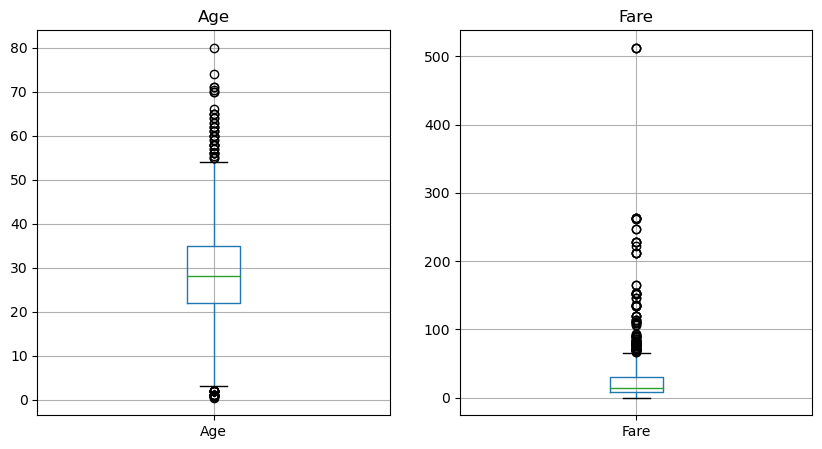

In [11]:
# Find outliers in 'Age' and 'Fare'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

train_data.boxplot(column=['Age'], ax=axes[0])
axes[0].set_title('Age')

train_data.boxplot(column=['Fare'], ax=axes[1])
axes[1].set_title('Fare')

plt.show()

In [12]:
# Remove outliers in 'Age' and 'Fare'
q = train_data.quantile(0.99)
train_data = train_data[(train_data['Age'] < q['Age']) & (train_data['Fare'] < q['Fare'])]

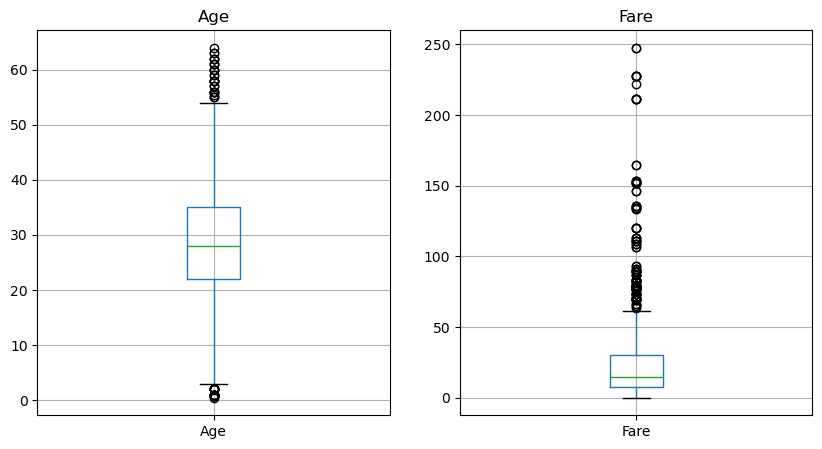

In [13]:
# Find outliers in 'Age' and 'Fare'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

train_data.boxplot(column=['Age'], ax=axes[0])
axes[0].set_title('Age')

train_data.boxplot(column=['Fare'], ax=axes[1])
axes[1].set_title('Fare')

plt.show()

In [14]:
#Know what percentage of all women on board survived.
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% de mujeres que sobrevivieron:", rate_women)

% de mujeres que sobrevivieron: 0.7361563517915309


In [15]:
#Know what percentage of all men on board survived.
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% de hombres que sobrevivieron:", rate_men)

% de hombres que sobrevivieron: 0.18861209964412812


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

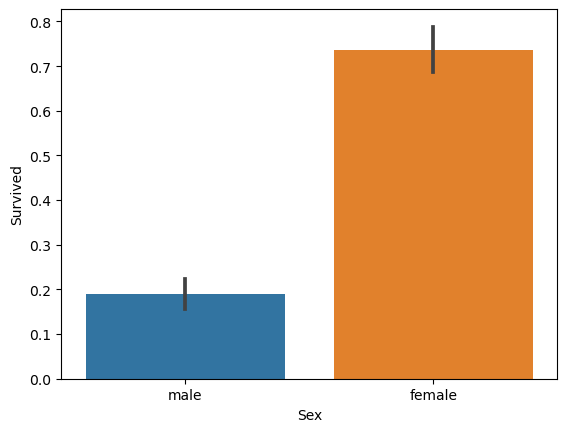

In [16]:
#Plot a gender survival bar graph
sns.barplot(x='Sex', y='Survived', data=train_data)

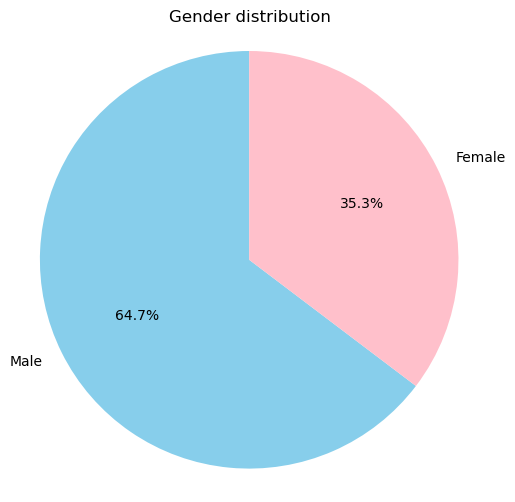

In [17]:
#Pie chart for gender distribution:
plt.figure(figsize=(6,6))
labels = ['Male', 'Female']
sizes = [train_data['Sex'].value_counts()[0], train_data['Sex'].value_counts()[1]]
colors = ['skyblue', 'pink']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Gender distribution')
plt.show()


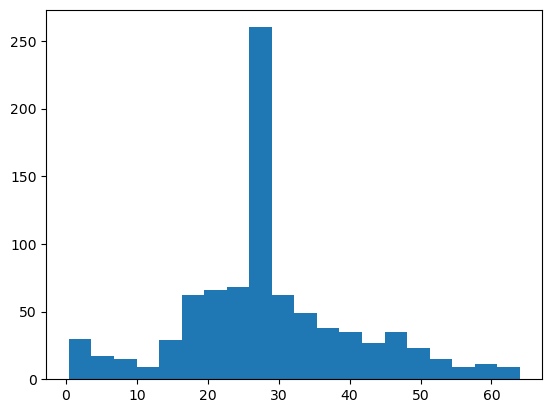

In [18]:
# Create a histogram of the variable 'Age'
import matplotlib.pyplot as plt
plt.hist(train_data['Age'].dropna(), bins=20)
plt.show()

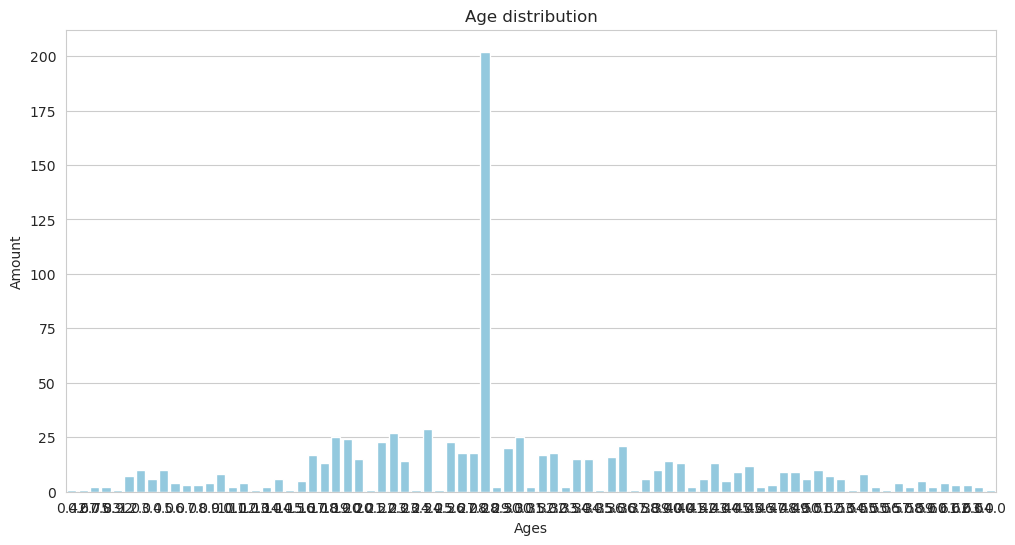

In [19]:
#Bar chart for age distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.countplot(x='Age', data=train_data, color='skyblue')
plt.title('Age distribution')
plt.xlabel('Ages')
plt.ylabel('Amount')
plt.show()


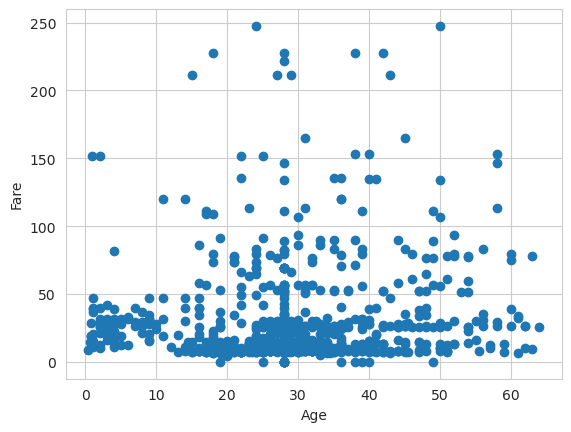

In [20]:
# Create a scatterplot of 'Age' vs. 'fare'
plt.scatter(train_data['Age'], train_data['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

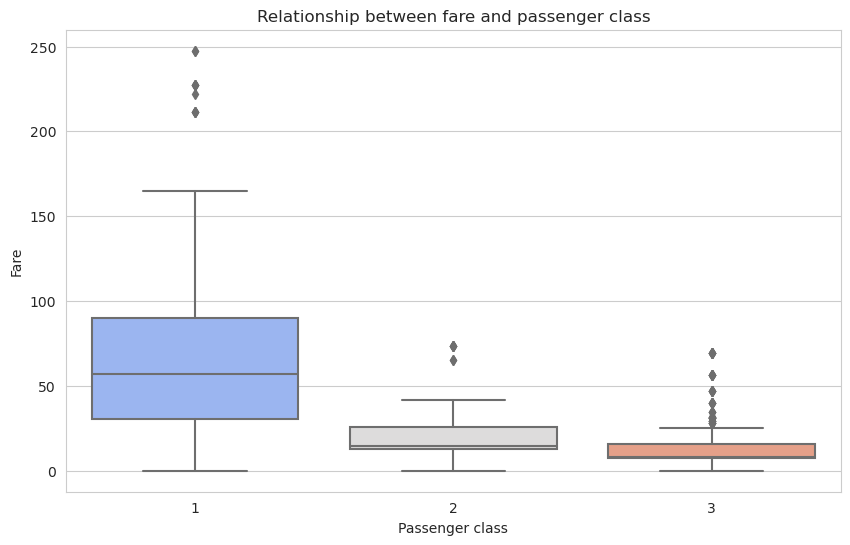

In [21]:
#Boxplot to show the relationship between fare and passenger class:
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass', y='Fare', data=train_data, palette='coolwarm')
plt.title('Relationship between fare and passenger class')
plt.xlabel('Passenger class')
plt.ylabel('Fare')
plt.show()


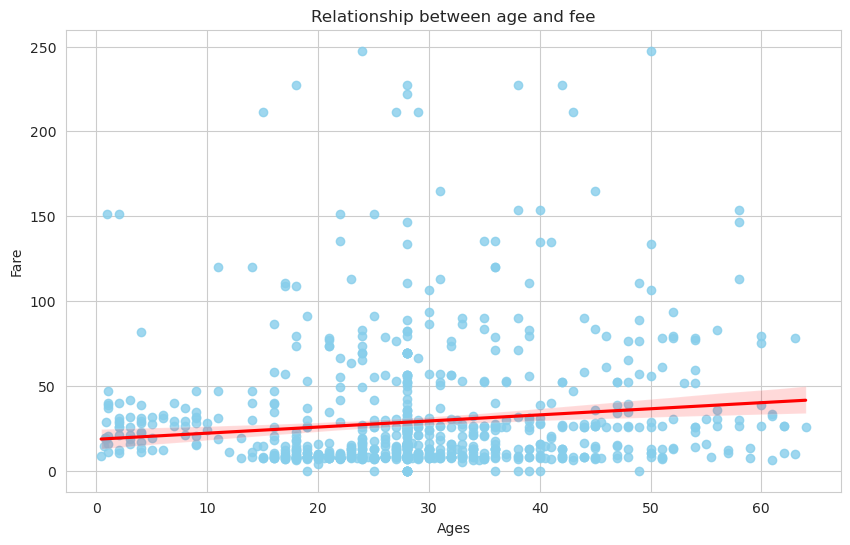

In [22]:
#Scatterplot with line fit to show the relationship between age and fee:
plt.figure(figsize=(10,6))
sns.regplot(x='Age', y='Fare', data=train_data, scatter_kws={"color": "skyblue"}, line_kws={"color": "red"})
plt.title('Relationship between age and fee')
plt.xlabel('Ages')
plt.ylabel('Fare')
plt.show()


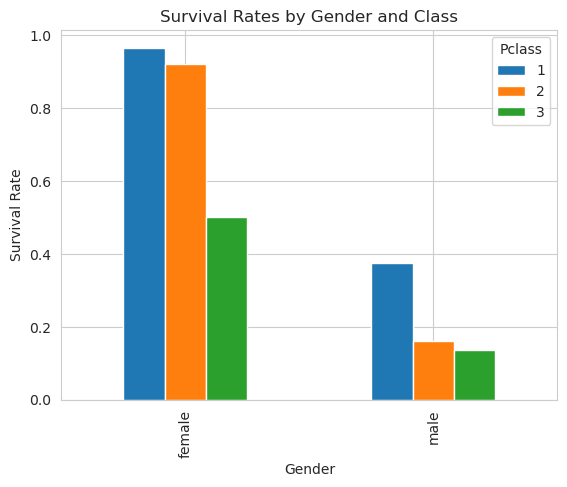

In [23]:
# Calculate survival rates by gender and class
survival_rates = train_data.groupby(['Sex', 'Pclass'])['Survived'].mean()

# Plot survival rates by gender and class
fig, ax = plt.subplots()
survival_rates.unstack().plot(kind='bar', ax=ax)
ax.set_xlabel('Gender')
ax.set_ylabel('Survival Rate')
ax.set_title('Survival Rates by Gender and Class')
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  after removing the cwd from sys.path.


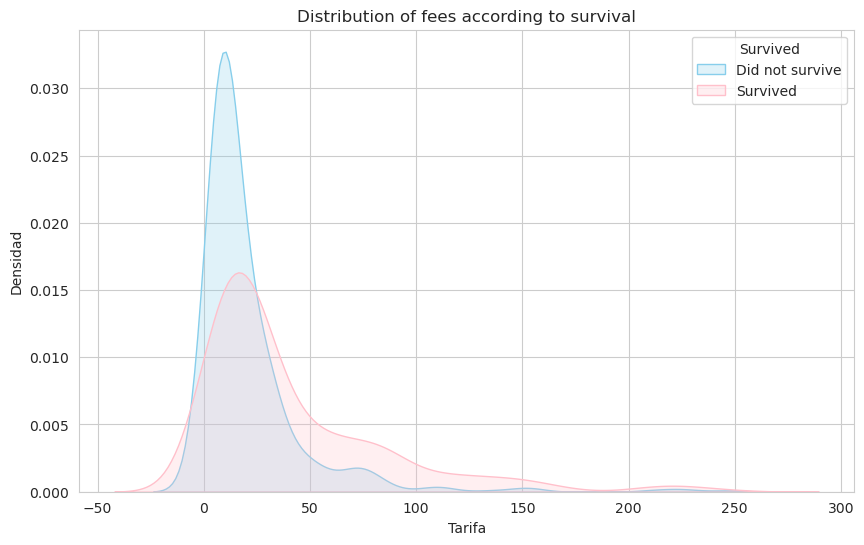

In [24]:
#Density graph to show the distribution of fees according to survival:
plt.figure(figsize=(10,6))
sns.kdeplot(x='Fare', data=train_data[train_data['Survived'] == 0], color='skyblue', shade=True)
sns.kdeplot(x='Fare', data=train_data[train_data['Survived'] == 1], color='pink', shade=True)
plt.title('Distribution of fees according to survival')
plt.xlabel('Tarifa')
plt.ylabel('Densidad')
plt.legend(['Did not survive', 'Survived'], title='Survived', loc='upper right')
plt.show()


<AxesSubplot:>

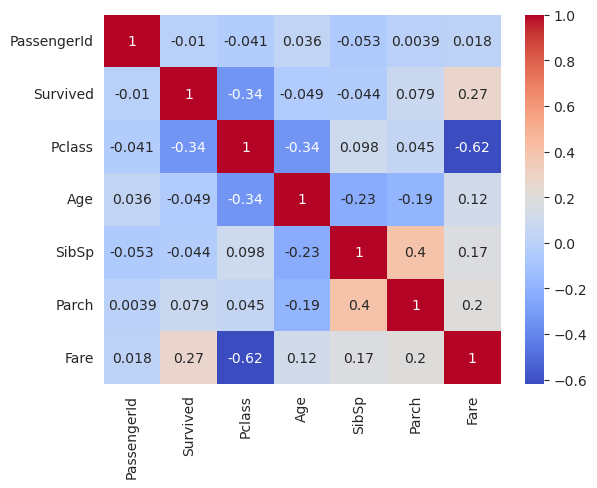

In [25]:
# Plot a correlation heatmap between features
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
